In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wragling

In [3]:
df = pd.read_excel('/content/ScrappingData2_Full1000.xlsx')
df.head()

,Property Name,Price,Property Type,Number Of Rooms,Size,Location,Furnished
0,Gurney Paragon Residences,4680000,Condo,3,770,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no
1,Middleton,3510000,Condo,3,776,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no
2,Golden Triangle 2,2340000,Penthouse,2,667,"Bukit Relau, Barat Daya Southwest Penang, Penang",no
3,Bayan Lepas,1950000,Penthouse,2,602,"Bayan Lepas, Barat Daya Southwest Penang, Penang",yes
4,Golden Triangle 2,3120000,Condo,2,666,"Bukit Relau, Barat Daya Southwest Penang, Penang",no


In [4]:
print('Jumlah baris dan kolom:', df.shape)

Jumlah baris dan kolom: (1000, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Property Name    1000 non-null   object
 1   Price            1000 non-null   int64 
 2   Property Type    1000 non-null   object
 3   Number Of Rooms  1000 non-null   int64 
 4   Size             1000 non-null   int64 
 5   Location         1000 non-null   object
 6   Furnished        1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [6]:
df.describe(include='all')

,Property Name,Price,Property Type,Number Of Rooms,Size,Location,Furnished
count,1000,1.000000e+03,1000,1000.000000,1000.000000,1000,1000
unique,183,NaN,6,NaN,NaN,19,2
top,3 Bedroom Apartment for rent at Gelugor,NaN,Apartment,NaN,NaN,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no
freq,61,NaN,312,NaN,NaN,310,752
mean,NaN,6.855246e+09,NaN,3.660000,2370.814000,NaN,NaN
std,NaN,7.937376e+10,NaN,2.073813,6584.316802,NaN,NaN
min,NaN,8.020860e+05,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,3.120000e+06,NaN,2.000000,476.750000,NaN,NaN
50%,NaN,6.623788e+06,NaN,3.000000,799.500000,NaN,NaN
75%,NaN,1.250000e+07,NaN,5.000000,1292.000000,NaN,NaN


In [7]:
print(df.isna().sum())

Property Name      0
Price              0
Property Type      0
Number Of Rooms    0
Size               0
Location           0
Furnished          0
dtype: int64


In [8]:
df = df.drop(df[df["Property Type"] == "Townhouse"].index)

In [9]:
print(df["Property Type"].unique())  # cek tipe property yang masih ada

['Condo' 'Penthouse' 'Apartment' 'Office' 'House']


In [10]:
# Misal kolom harga = "Price"
kurs_idr_to_myr = 3500  # 1 MYR = 3500 IDR

df["Price_MYR"] = df["Price"] / kurs_idr_to_myr

In [11]:
print(df[["Price", "Price_MYR"]].head())

     Price    Price_MYR
0  4680000  1337.142857
1  3510000  1002.857143
2  2340000   668.571429
3  1950000   557.142857
4  3120000   891.428571


In [12]:
df.drop('Price',axis=1, inplace=True)

In [13]:
def check_outlier(df, columns):
    n_columns = len(columns)
    fig, axs = plt.subplots(1, n_columns, figsize=(5 * n_columns, 5))
    outlier_columns = []
    for i, col in enumerate(columns):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(col)
        sns.boxplot(y=df[col], ax=axs[i])
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
    print('Terdeteksi outlier: ',outlier_columns)
    return outlier_columns


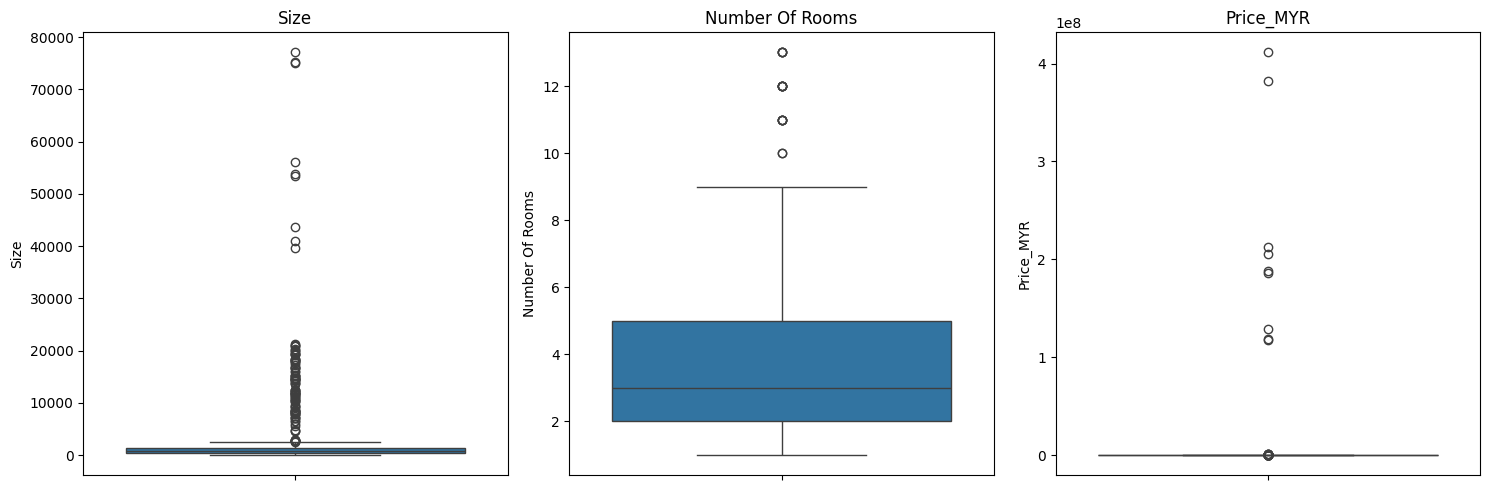

Terdeteksi outlier:  ['Size', 'Number Of Rooms', 'Price_MYR']


In [14]:
terdeteksi_outlier = check_outlier(df, ['Size', 'Number Of Rooms', "Price_MYR"])

In [15]:
def delete_outlier(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

In [16]:
df = delete_outlier(df, terdeteksi_outlier)

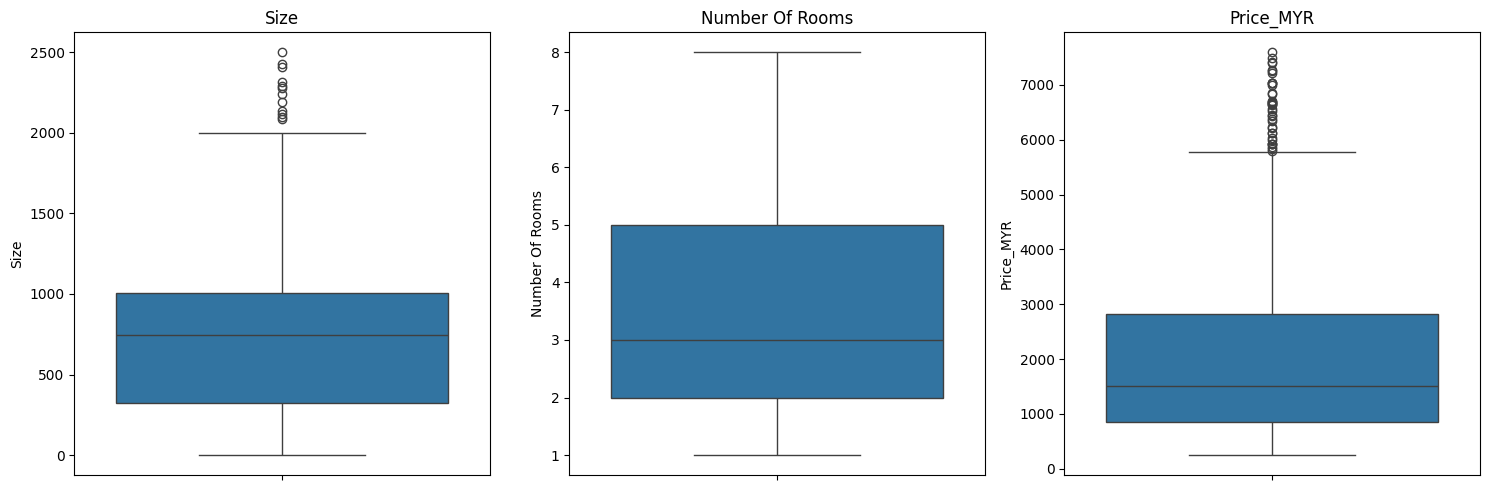

Terdeteksi outlier:  ['Size', 'Price_MYR']


In [17]:
check_outlier = check_outlier(df, ['Size', 'Number Of Rooms', "Price_MYR"])

# Preprocessing

## Feature Engineering

In [18]:
df[["City", "District", "State"]] = df["Location"].str.split(",", expand=True)

# Bersihkan spasi
df["City"] = df["City"].str.strip()
df["District"] = df["District"].str.strip()
df["State"] = df["State"].str.strip()

df.head()

,Property Name,Property Type,Number Of Rooms,Size,Location,Furnished,Price_MYR,City,District,State
0,Gurney Paragon Residences,Condo,3,770,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no,1337.142857,Bandaraya Georgetown,Timur Laut Northeast Penang,Penang
1,Middleton,Condo,3,776,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no,1002.857143,Bandaraya Georgetown,Timur Laut Northeast Penang,Penang
2,Golden Triangle 2,Penthouse,2,667,"Bukit Relau, Barat Daya Southwest Penang, Penang",no,668.571429,Bukit Relau,Barat Daya Southwest Penang,Penang
3,Bayan Lepas,Penthouse,2,602,"Bayan Lepas, Barat Daya Southwest Penang, Penang",yes,557.142857,Bayan Lepas,Barat Daya Southwest Penang,Penang
4,Golden Triangle 2,Condo,2,666,"Bukit Relau, Barat Daya Southwest Penang, Penang",no,891.428571,Bukit Relau,Barat Daya Southwest Penang,Penang


In [19]:
print(df.columns)

Index(['Property Name', 'Property Type', 'Number Of Rooms', 'Size', 'Location',
       'Furnished', 'Price_MYR', 'City', 'District', 'State'],
      dtype='object')


Drop the unused column

In [20]:
df.drop(['Location', 'Property Name','State'], axis=1, inplace=True)
df.head()

,Property Type,Number Of Rooms,Size,Furnished,Price_MYR,City,District
0,Condo,3,770,no,1337.142857,Bandaraya Georgetown,Timur Laut Northeast Penang
1,Condo,3,776,no,1002.857143,Bandaraya Georgetown,Timur Laut Northeast Penang
2,Penthouse,2,667,no,668.571429,Bukit Relau,Barat Daya Southwest Penang
3,Penthouse,2,602,yes,557.142857,Bayan Lepas,Barat Daya Southwest Penang
4,Condo,2,666,no,891.428571,Bukit Relau,Barat Daya Southwest Penang


In [21]:
df["City_District"] = df["City"].str.strip() + "_" + df["District"].str.strip()
df.drop(['City', 'District'],  axis=1, inplace=True )

In [22]:
df.head()

,Property Type,Number Of Rooms,Size,Furnished,Price_MYR,City_District
0,Condo,3,770,no,1337.142857,Bandaraya Georgetown_Timur Laut Northeast Penang
1,Condo,3,776,no,1002.857143,Bandaraya Georgetown_Timur Laut Northeast Penang
2,Penthouse,2,667,no,668.571429,Bukit Relau_Barat Daya Southwest Penang
3,Penthouse,2,602,yes,557.142857,Bayan Lepas_Barat Daya Southwest Penang
4,Condo,2,666,no,891.428571,Bukit Relau_Barat Daya Southwest Penang


In [23]:
df.describe(include='all')

,Property Type,Number Of Rooms,Size,Furnished,Price_MYR,City_District
count,837,837.000000,837.000000,837,837.000000,837
unique,5,NaN,NaN,2,NaN,17
top,Apartment,NaN,NaN,no,NaN,Bandaraya Georgetown_Timur Laut Northeast Penang
freq,264,NaN,NaN,660,NaN,263
mean,NaN,3.413381,746.200717,NaN,2090.123125,NaN
std,NaN,1.724080,498.987144,NaN,1652.617633,NaN
min,NaN,1.000000,0.000000,NaN,250.571429,NaN
25%,NaN,2.000000,323.000000,NaN,851.428571,NaN
50%,NaN,3.000000,746.000000,NaN,1502.857143,NaN
75%,NaN,5.000000,1006.000000,NaN,2829.086857,NaN


In [24]:

df["Furnished"] = df["Furnished"].str.strip().str.lower().map({
    "yes": 1,
    "no": 0
})

data_encoded = pd.get_dummies(df, columns=["City_District", 'Property Type'], prefix="CD")


print(data_encoded.head())

   Number Of Rooms  Size  Furnished    Price_MYR  \
0                3   770          0  1337.142857   
1                3   776          0  1002.857143   
2                2   667          0   668.571429   
3                2   602          1   557.142857   
4                2   666          0   891.428571   

   CD_Ayer Itam_Timur Laut Northeast Penang  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   CD_Bandaraya Georgetown_Timur Laut Northeast Penang  \
0                                               True     
1                                               True     
2                                              False     
3                                              False     
4                                              False     

   CD_Bayan Lepas_Barat Daya Southwest Penang  \
0     

## Data Cleaning

In [25]:
data_encoded.duplicated().any()

np.True_

In [26]:
data_encoded.duplicated().sum()

np.int64(6)

In [27]:
df[df.duplicated()]

,Property Type,Number Of Rooms,Size,Furnished,Price_MYR,City_District
27,Penthouse,2,602,1,557.142857,Mukim 15_Central Seberang Perai
80,Penthouse,2,700,0,891.428571,Mukim 13_Central Seberang Perai
131,Office,2,108,0,945.714286,Bandaraya Georgetown_Timur Laut Northeast Penang
141,Office,2,108,0,462.857143,Bandaraya Georgetown_Timur Laut Northeast Penang
269,Apartment,7,1320,0,2785.714286,Bayan Lepas_Barat Daya Southwest Penang
322,Penthouse,2,602,1,557.142857,Mukim 15_Central Seberang Perai


In [28]:
numeric_cols = ["Price_MYR", "Size",'Number Of Rooms']

for col in numeric_cols:
    mean_val = data_encoded.loc[data_encoded[col] != 0, col].mean()
    data_encoded[col] = data_encoded[col].replace(0, mean_val)

In [29]:
data_encoded.head()

,Number Of Rooms,Size,Furnished,Price_MYR,CD_Ayer Itam_Timur Laut Northeast Penang,CD_Bandaraya Georgetown_Timur Laut Northeast Penang,CD_Bayan Lepas_Barat Daya Southwest Penang,CD_Bukit Balik Pulau_Barat Daya Southwest Penang,CD_Bukit Relau_Barat Daya Southwest Penang,CD_Mukim 10_Central Seberang Perai,...,CD_Mukim 15_Central Seberang Perai,CD_Paya Terubong_Timur Laut Northeast Penang,CD_Pondok Upeh_Barat Daya Southwest Penang,CD_Tanjong Tokong_Timur Laut Northeast Penang,CD_Telok Kumbar_Barat Daya Southwest Penang,CD_Apartment,CD_Condo,CD_House,CD_Office,CD_Penthouse
0,3,770.0,0,1337.142857,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,3,776.0,0,1002.857143,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,667.0,0,668.571429,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,2,602.0,1,557.142857,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2,666.0,0,891.428571,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


# Prediction

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib

In [31]:

x = data_encoded.drop(['Price_MYR'], axis=1)
y = data_encoded['Price_MYR']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi di train dan test
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
# Hitung metrik
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("=== TRAIN ===")
print(f"RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R²: {r2_train:.3f}")

print("\n=== TEST ===")
print(f"RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.3f}")


=== TRAIN ===
RMSE: 319.21, MAE: 201.64, R²: 0.961

=== TEST ===
RMSE: 757.07, MAE: 511.91, R²: 0.821


In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Kumpulan model yang akan diuji
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

# DataFrame untuk simpan hasil
results = []

# Loop semua model
for name, model in models.items():
    # Training
    model.fit(x_train, y_train)

    # Prediksi
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Hitung metrik
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Simpan hasil
    results.append({
        "Model": name,
        "RMSE_Train": rmse_train,
        "RMSE_Test": rmse_test,
        "MAE_Train": mae_train,
        "MAE_Test": mae_test,
        "R2_Train": r2_train,
        "R2_Test": r2_test
    })

# Konversi ke DataFrame untuk mudah dibaca
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2_Test", ascending=False))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+07, tolerance: 1.745e+05
  model = cd_fast.enet_coordinate_descent(


              Model   RMSE_Train    RMSE_Test   MAE_Train    MAE_Test  \
4      RandomForest   310.966878   740.519023  199.295419  500.077065   
5  GradientBoosting   666.261579   796.893349  459.911845  585.551460   
6           XGBoost   229.013502   817.993250  115.162431  505.626657   
3      DecisionTree   101.895379   880.953398   22.512045  500.510678   
0  LinearRegression  1262.626936  1279.613877  870.180591  925.640897   
1             Ridge  1264.325126  1285.141280  873.950156  931.604413   
2             Lasso  1263.658331  1286.465276  873.503710  930.766793   

   R2_Train   R2_Test  
4  0.962923  0.828429  
5  0.829796  0.801312  
6  0.979890  0.790651  
3  0.996019  0.757184  
0  0.388733  0.487695  
1  0.387087  0.483259  
2  0.387734  0.482194  


In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(), x_train, y_train,
                         cv=5, scoring="r2")
print("CV mean R²:", scores.mean())


CV mean R²: 0.7180567583509575


# Pipeline

In [37]:
dataPipeline = pd.read_excel('/content/ScrappingData2_Full1000.xlsx')
dataPipeline.head()

,Property Name,Price,Property Type,Number Of Rooms,Size,Location,Furnished
0,Gurney Paragon Residences,4680000,Condo,3,770,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no
1,Middleton,3510000,Condo,3,776,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no
2,Golden Triangle 2,2340000,Penthouse,2,667,"Bukit Relau, Barat Daya Southwest Penang, Penang",no
3,Bayan Lepas,1950000,Penthouse,2,602,"Bayan Lepas, Barat Daya Southwest Penang, Penang",yes
4,Golden Triangle 2,3120000,Condo,2,666,"Bukit Relau, Barat Daya Southwest Penang, Penang",no


In [38]:
dataPipeline = dataPipeline.drop(dataPipeline[dataPipeline["Property Type"] == "Townhouse"].index)

In [39]:
# Misal kolom harga = "Price"
kurs_idr_to_myr = 3500  # 1 MYR = 3500 IDR

dataPipeline["Price_MYR"] = dataPipeline["Price"] / kurs_idr_to_myr

In [40]:
dataPipeline.drop('Price',axis=1, inplace=True)

In [41]:
def check_outlier(df, columns):
    n_columns = len(columns)
    fig, axs = plt.subplots(1, n_columns, figsize=(5 * n_columns, 5))
    outlier_columns = []
    for i, col in enumerate(columns):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(col)
        sns.boxplot(y=df[col], ax=axs[i])
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
    print('Terdeteksi outlier: ',outlier_columns)
    return outlier_columns


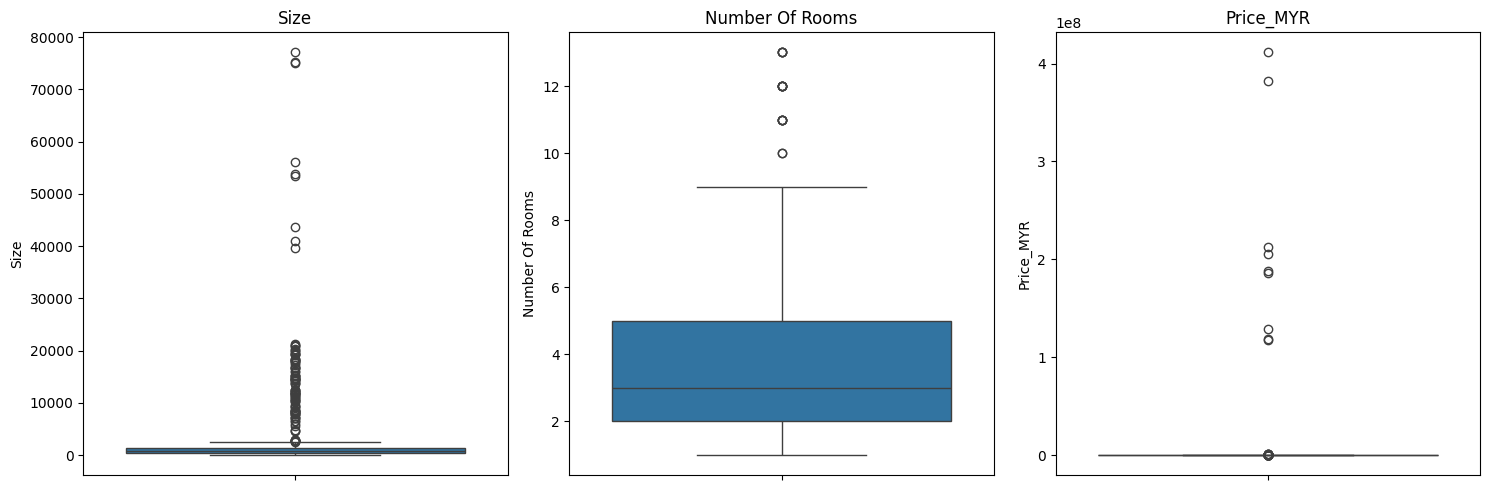

Terdeteksi outlier:  ['Size', 'Number Of Rooms', 'Price_MYR']


In [42]:
terdeteksi_outlier = check_outlier(dataPipeline, ['Size', 'Number Of Rooms', "Price_MYR"])

In [43]:
def delete_outlier(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

In [44]:
dataPipeline = delete_outlier(dataPipeline, terdeteksi_outlier)

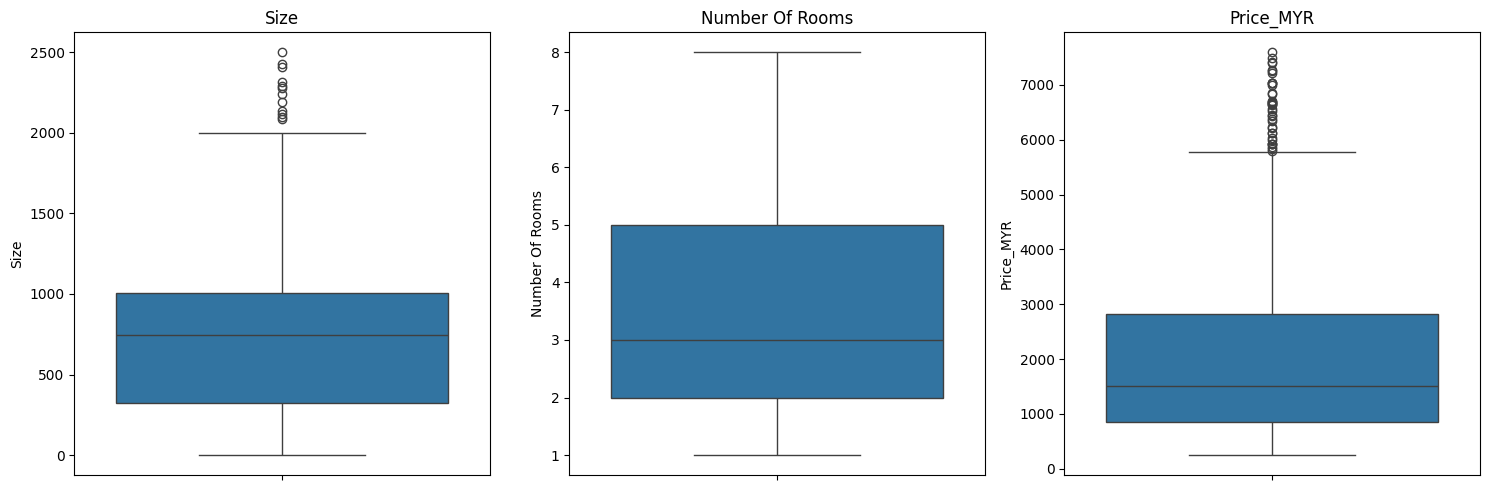

Terdeteksi outlier:  ['Size', 'Price_MYR']


In [45]:
terdeteksi_outlier = check_outlier(dataPipeline, ['Size', 'Number Of Rooms', "Price_MYR"])

In [46]:
dataPipeline[["City", "District", "State"]] = dataPipeline["Location"].str.split(",", expand=True)

# Bersihkan spasi
dataPipeline["City"] = dataPipeline["City"].str.strip()
dataPipeline["District"] = dataPipeline["District"].str.strip()
dataPipeline["State"] = dataPipeline["State"].str.strip()

dataPipeline.head()

,Property Name,Property Type,Number Of Rooms,Size,Location,Furnished,Price_MYR,City,District,State
0,Gurney Paragon Residences,Condo,3,770,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no,1337.142857,Bandaraya Georgetown,Timur Laut Northeast Penang,Penang
1,Middleton,Condo,3,776,"Bandaraya Georgetown, Timur Laut Northeast Pen...",no,1002.857143,Bandaraya Georgetown,Timur Laut Northeast Penang,Penang
2,Golden Triangle 2,Penthouse,2,667,"Bukit Relau, Barat Daya Southwest Penang, Penang",no,668.571429,Bukit Relau,Barat Daya Southwest Penang,Penang
3,Bayan Lepas,Penthouse,2,602,"Bayan Lepas, Barat Daya Southwest Penang, Penang",yes,557.142857,Bayan Lepas,Barat Daya Southwest Penang,Penang
4,Golden Triangle 2,Condo,2,666,"Bukit Relau, Barat Daya Southwest Penang, Penang",no,891.428571,Bukit Relau,Barat Daya Southwest Penang,Penang


In [47]:
dataPipeline.drop(['Location', 'Property Name','State'], axis=1, inplace=True)
dataPipeline.head()

,Property Type,Number Of Rooms,Size,Furnished,Price_MYR,City,District
0,Condo,3,770,no,1337.142857,Bandaraya Georgetown,Timur Laut Northeast Penang
1,Condo,3,776,no,1002.857143,Bandaraya Georgetown,Timur Laut Northeast Penang
2,Penthouse,2,667,no,668.571429,Bukit Relau,Barat Daya Southwest Penang
3,Penthouse,2,602,yes,557.142857,Bayan Lepas,Barat Daya Southwest Penang
4,Condo,2,666,no,891.428571,Bukit Relau,Barat Daya Southwest Penang


In [48]:
dataPipeline["City_District"] = dataPipeline["City"].str.strip() + "_" + dataPipeline["District"].str.strip()
dataPipeline.drop(['City', 'District'],  axis=1, inplace=True )

In [49]:
dataPipeline.head()

,Property Type,Number Of Rooms,Size,Furnished,Price_MYR,City_District
0,Condo,3,770,no,1337.142857,Bandaraya Georgetown_Timur Laut Northeast Penang
1,Condo,3,776,no,1002.857143,Bandaraya Georgetown_Timur Laut Northeast Penang
2,Penthouse,2,667,no,668.571429,Bukit Relau_Barat Daya Southwest Penang
3,Penthouse,2,602,yes,557.142857,Bayan Lepas_Barat Daya Southwest Penang
4,Condo,2,666,no,891.428571,Bukit Relau_Barat Daya Southwest Penang


In [50]:
numeric_cols = ["Price_MYR", "Size",'Number Of Rooms']

for col in numeric_cols:
    mean_val = data_encoded.loc[data_encoded[col] != 0, col].mean()
    data_encoded[col] = data_encoded[col].replace(0, mean_val)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [52]:
def yes_no_to_int(x):
    if isinstance(x, pd.DataFrame):
        x = x.iloc[:, 0].astype(str)
    else:
        x = pd.Series(x.ravel()).astype(str)

    return (x.str.strip().str.lower().isin(["yes", "1", "true"])).astype(int).values.reshape(-1, 1)


bool_transformer = FunctionTransformer(yes_no_to_int)

In [53]:
numeric_features = ["Size", "Number Of Rooms"]
boolean_features = ["Furnished"]
categorical_features = ["Property Type", "City_District"]

In [54]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bool", bool_transformer, boolean_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [55]:
# ===============================
# Pipeline
# ===============================
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42, n_estimators=100))
])

In [56]:
X = dataPipeline.drop(['Price_MYR'], axis=1)
y = dataPipeline['Price_MYR']

In [57]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# ===============================
# Evaluation
# ===============================
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("=== TRAIN ===")
print(f"RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R²: {r2_train:.3f}")

print("\n=== TEST ===")
print(f"RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.3f}")

=== TRAIN ===
RMSE: 311.88, MAE: 197.57, R²: 0.963

=== TEST ===
RMSE: 747.86, MAE: 510.13, R²: 0.825


In [58]:
import joblib

joblib.dump(model, 'model_pipeline.pkl')

['model_pipeline.pkl']